# Introduction

This lab will guide you through the process of using the Scikit-learn MLPClassifier to compare the performance of different stochastic learning strategies, including SGD and Adam. The MLPClassifier is a neural network classifier that uses backpropagation to optimize the weights of the network. The goal of this lab is to show how different stochastic learning strategies can affect the training loss curves of the MLPClassifier. We will use several small datasets for this example, although the general trend shown in these examples seems to carry over to larger datasets.

# Import necessary libraries

First, we need to import the necessary libraries, including MLPClassifier, MinMaxScaler, datasets, and matplotlib.pyplot. We will also import ConvergenceWarning to ignore convergence warnings during training.

In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# Define different learning strategies

Next, we need to define the different learning strategies we want to compare. We will define several different learning rate schedules and momentum parameters, including constant learning-rate, constant with momentum, constant with Nesterov's momentum, inv-scaling learning-rate, inv-scaling with momentum, inv-scaling with Nesterov's momentum, and adam. We will also define labels and plot_args to use in our plot later.

In [2]:
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]

# Define a function to plot the learning curves

Next, we need to define a function that will plot the learning curves for each learning strategy on each dataset. The function takes in the dataset (X, y), an axis to plot on, and a name for the dataset. We will use MinMaxScaler to scale the data and MLPClassifier to train the neural network. We will train the network using each learning strategy, ignoring convergence warnings, and plot the learning curves for each strategy on the same plot.

In [3]:
def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

# Load or generate small datasets

Now, we need to load or generate the small datasets we will use for this example. We will use the iris dataset, the digits dataset, and two datasets generated using make_circles and make_moons functions.

In [4]:
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
    datasets.make_moons(noise=0.3, random_state=0),
]

# Plot the learning curves for each dataset

Finally, we can plot the learning curves for each dataset using the plot_on_dataset function. We will create a 2x2 plot and plot each dataset on a separate axis.


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

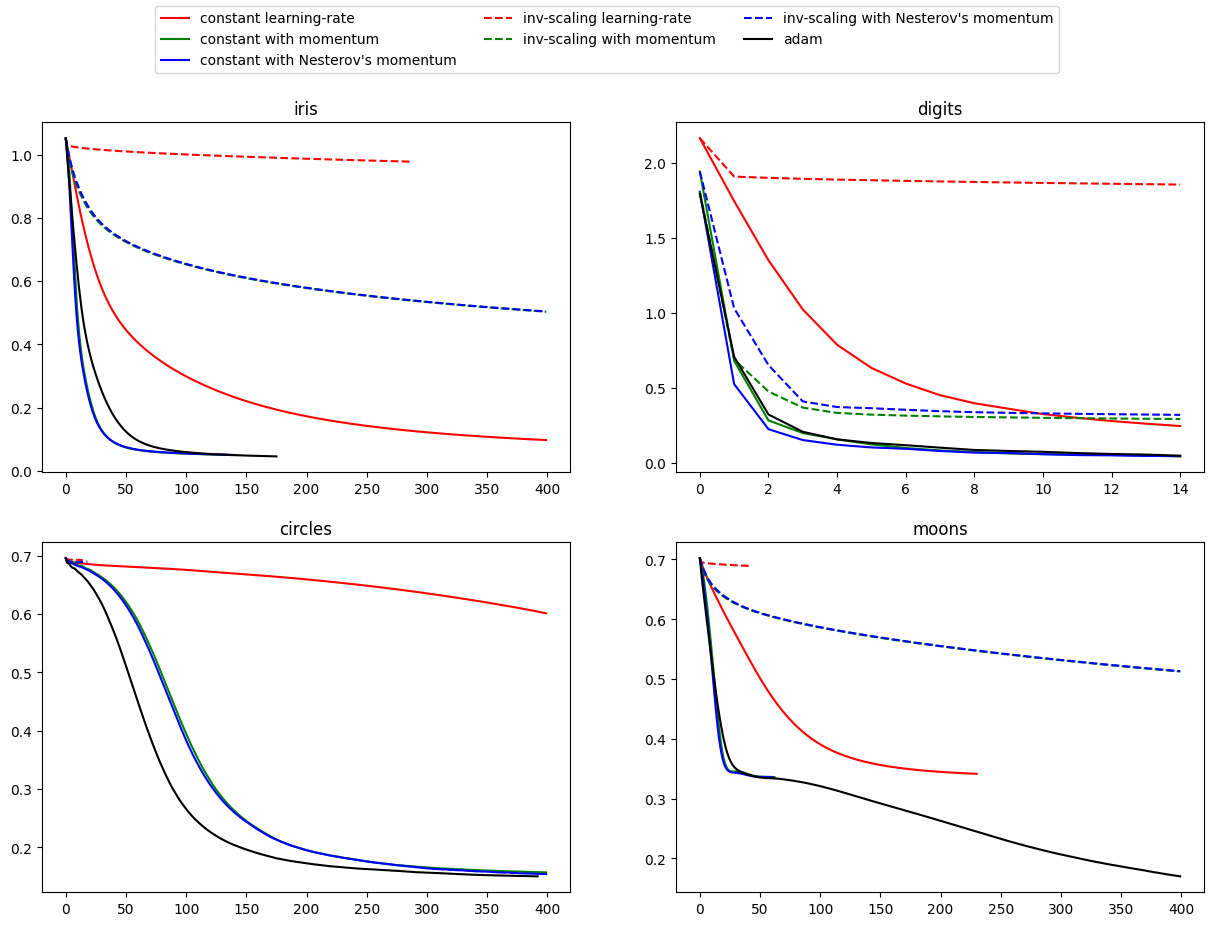

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

# Summary

In this lab, we used the Scikit-learn MLPClassifier to compare the performance of different stochastic learning strategies, including SGD and Adam, on several small datasets. We defined different learning rate schedules and momentum parameters, and then trained the MLPClassifier using each strategy. We plotted the learning curves for each strategy on each dataset and observed how different strategies can affect the training loss curves. We demonstrated the importance of choosing the right learning strategy for the dataset and the task at hand.